In [1]:
import pickle
def read_bin(filename):
    with open(filename,'rb') as bf:
        bin_data = pickle.load(bf)
    return bin_data

def save_bin(filename,data):
    with open(filename,'wb') as bf:
        pickle.dump(data,bf)

In [2]:
gpt4_df=read_bin("new_data/gpt4_df.bin")

In [3]:
FABLE = read_bin("new_data/FABLE.bin")

In [4]:
FABLE[0]

'Does the message fit into a larger story or argument, for example about how the world works or how people think?'

In [5]:
gpt4_df.head(1)

,id,datePublished,itemReviewed.datePublished,claimReviewed,author.name,reviewRating.@type,reviewRating.ratingValue,reviewRating.alternateName,date_diff,language
25,75eae0a2-c474-4200-9889-f1f80a83be5e,2024-04-09 00:00:00+00:00,2024-03-27 00:00:00+00:00,Laut ORF-Artikel wurde Siegfried Meryn in eine...,dpa,Rating,NaN,"Die angebliche ORF-Webseite wurde gefälscht, d...",13.0,de


In [6]:
def duplicate_checker(df):
    if df['id'].duplicated().any():
        print("There are duplicate IDs. Here they are:")
        # 重複している行を表示
        print(df[df['id'].duplicated(keep=False)])
    else:
        print("No duplicate IDs found.")
        
duplicate_checker(gpt4_df)

No duplicate IDs found.


In [7]:
len(gpt4_df)

6718

In [8]:
gpt4_df['language'].value_counts()

en         3541
es          506
te          352
ta          294
de          293
pt          234
nl          225
kn          206
unknown     192
fr          159
hi          156
tr          119
bn          118
ru           92
th           56
tl           38
pl           36
he           24
gu            9
ur            9
ar            8
ca            7
af            5
ko            5
it            5
pa            4
id            4
zh-tw         3
uk            3
sv            3
sw            2
mr            2
bg            2
cy            1
mk            1
et            1
hr            1
ne            1
fi            1
Name: language, dtype: int64

In [10]:
# gpt4_df_old = gpt4_df
# gpt4_df = gpt4_df_old
gpt4_df = gpt4_df[gpt4_df['language'] == 'en']
# gpt4_df = gpt4_df_old
# gpt4_df = gpt4_df[gpt4_df['language'] == 'es']

In [12]:
# gpt4_df

## YES集計ans_dict_fix・描画

In [13]:
gpt4_df_id = list(gpt4_df["id"])
gpt4_df_date_diff = list(gpt4_df["date_diff"])
CL = list(gpt4_df["claimReviewed"])

In [14]:
CL_d = dict()
for i in range(len(gpt4_df_id)):
    CL_d[gpt4_df_id[i]] = CL[i]

In [15]:
gpt4_df_date_diff_d = dict()

for c_id,diff in zip(gpt4_df_id,gpt4_df_date_diff):
    gpt4_df_date_diff_d[c_id] = diff

## 現時点で取得できた全データを使用して描写

In [30]:
ans_d = read_bin("new_data/concat_ans_dict/ans_d.bin")#1405

import re
pattern = re.compile(r'<answer>(.*?)</answer>', re.IGNORECASE)
    
sum_yes_l = []
diff_l = []
for k,v in ans_d.items():
    yes_num = 0
    if k in gpt4_df_date_diff_d:
        diff_l.append(gpt4_df_date_diff_d[k])
        for i in range(52):
            match = pattern.findall(v[i])
            try:
                if match[0] == 'Yes':
                    yes_num += 1
            except:
                pass
    #             print(match,text)
        sum_yes_l.append(yes_num)

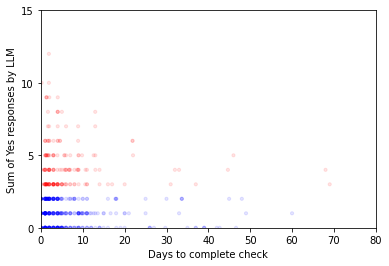

<Figure size 432x288 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# 散布図の作成
threshold = np.percentile(sum_yes_l, 75)
# 色を設定（上位30%は赤、それ以外は青）
colors = ['red' if val >= threshold else 'blue' for val in sum_yes_l]

plt.scatter(diff_l,sum_yes_l,s=10,alpha=0.1,c=colors)

# タイトルとラベルの設定
# plt.title("Scatter Plot Example")
plt.xlabel("Days to complete check")
plt.ylabel("Sum of Yes responses by LLM")

plt.ylim(0, 15)
plt.xlim(0, 80)

plt.yticks(np.arange(0, 16, 5))
# グラフの表示
plt.show()
plt.savefig('scatter_plot.png')

## Yes No Unknowe error

In [334]:
ans_d = read_bin("new_data/concat_ans_dict/ans_d.bin")#1405

yes = 0
no = 0
Unknown = 0
error = 0

import re
pattern = re.compile(r'<answer>(.*?)</answer>', re.IGNORECASE)
    
sum_yes_l = []
diff_l = []
k_l = []
for k,v in ans_d.items():
    yes_num = 0
    error_TF = False
    for i in range(52):
        match = pattern.findall(v[i])
#         print(match)
        if len(match) == 1:
            if 'Yes' in match[0] or 'yes' in match[0] or 'YES' in match[0]:
#                 print("1")
                yes += 1
                yes_num += 1
            elif 'Unknown' in match[0] or 'unknown' in match[0] or 'UNKNOWN' in match[0]:
#                 print("13")
                Unknown +=1
            elif 'No' in match[0] or 'no' in match[0] or 'NO' in match[0]:
#                 print("12")
                no +=1
            else:
#                 print("4")
                error +=1
                error_TF = True
                
        else:
            error +=1
            error_TF = True
            
    if error_TF == False:
        sum_yes_l.append(yes_num)
        diff_l.append(gpt4_df_date_diff_d[k])
        k_l.append(k)

In [289]:
yes

3328

In [290]:
no

38730

In [291]:
Unknown

30869

In [292]:
error

133

## 多重配列

In [16]:
ans_d = read_bin("new_data/concat_ans_dict/ans_d.bin")#1405

yes = 0
no = 0
Unknown = 0
error = 0

import re
pattern = re.compile(r'<answer>(.*?)</answer>', re.IGNORECASE)
sum_yes_l = []
diff_l = []
k_l = []
for k,v in ans_d.items():
    if k in gpt4_df_date_diff_d:
        ans_l = []
        error_TF = False
        for i in range(52):
            match = pattern.findall(v[i])
    #         print(match)
            if len(match) == 1:
                if 'Yes' in match[0] or 'yes' in match[0] or 'YES' in match[0]:
    #                 print("1")
                    ans_l.append(0)
                elif 'Unknown' in match[0] or 'unknown' in match[0] or 'UNKNOWN' in match[0]:
    #                 print("13")
                    ans_l.append(0)
                elif 'No' in match[0] or 'no' in match[0] or 'NO' in match[0]:
    #                 print("12")
                    ans_l.append(-1)
                else:
                    error_TF = True

            else:
                error_TF = True

        if error_TF == False:
            sum_yes_l.append(ans_l)
            diff_l.append(gpt4_df_date_diff_d[k])
            k_l.append(k)

In [55]:
# sum_yes_l[0:10]

In [56]:
def sum_elements_by_index(nested_lists):
    # 各インデックスごとの合計を保持するリストを初期化
    max_length = max(len(sublist) for sublist in nested_lists)
    sums = [0] * max_length
    
    # 各リストをループし、対応するインデックスの値を合計
    for sublist in nested_lists:
        for i, value in enumerate(sublist):
            sums[i] += value
            
    return sums

In [53]:
# if 'Yes' ans_l.append(1)
result_yes = sum_elements_by_index(sum_yes_l)
print(result_yes)

[217, 51, 10, 3, 0, 4, 4, 0, 1, 12, 5, 19, 64, 0, 0, 0, 7, 100, 0, 37, 0, 35, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 42, 0, 0, 44, 5, 66, 0, 209, 18, 0, 129, 0, 2, 2, 0, 0, 0, 0, 0, 4]


In [57]:
# if 'Yes' ans_l.append(1)
result_unknown = sum_elements_by_index(sum_yes_l)
print(result_unknown)

[268, 15, 2, 8, 5, 19, 41, 83, 2, 63, 24, 42, 64, 240, 440, 436, 398, 423, 190, 89, 41, 68, 554, 516, 424, 479, 522, 552, 430, 438, 548, 496, 514, 42, 23, 412, 177, 53, 286, 230, 486, 11, 35, 18, 13, 7, 2, 5, 5, 554, 461, 446]


In [59]:
result_no = sum_elements_by_index(sum_yes_l)
print(result_no)

[73, 492, 546, 547, 553, 535, 513, 475, 555, 483, 529, 497, 430, 318, 118, 122, 153, 35, 368, 432, 517, 455, 4, 42, 134, 79, 36, 6, 127, 120, 8, 62, 2, 516, 535, 102, 376, 439, 272, 119, 54, 547, 394, 540, 543, 549, 556, 553, 553, 4, 97, 108]


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

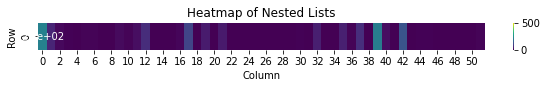

In [64]:
plt.figure(figsize=(10, 0.5))
# sns.heatmap([result_yes], annot=True, cmap='viridis', cbar=True)
sns.heatmap([result_yes], annot=True, cmap='viridis', cbar=True, vmin=0, vmax=500)
plt.title('Heatmap of Nested Lists')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

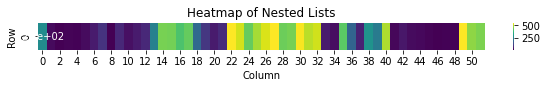

In [62]:
plt.figure(figsize=(10, 0.5))
sns.heatmap([result_unknown], annot=True, cmap='viridis', cbar=True)
plt.title('Heatmap of Nested Lists')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

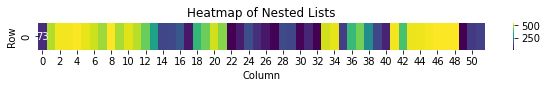

In [63]:
plt.figure(figsize=(10, 0.5))
sns.heatmap([result_no], annot=True, cmap='viridis', cbar=True)
plt.title('Heatmap of Nested Lists')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

In [324]:
FABLE[22:33]

['Does the poster and/or organization/outlet have a noteworthy number of social media/community followers?',
 'Is the content published by an organization/outlet with uncertain editorial control (e.g., is not a recognized news publisher)?',
 'Does the poster have credentials that represents some kind of expertise?',
 'Is the content posted by an imposter individual or counterfeit outlet that could successfully pass as a different person/account based only upon a quick glance?',
 'Does the content have the graphics and styling of a legitimate news agency or mainstream information source?',
 'Do the people or entities who are spreading the piece of content have a broad reach (size of following on social media, “influencer,” presence on TV or other news media)?',
 'Are the people or entities known to be repeat spreaders of questionable information?',
 'Is there evidence of coordination activity (whether bot/automated or not) to encourage spread?',
 'Is the content publicly accessible (pos

In [325]:
FABLE[13:22]

['Does the direct target or current audience members directly addressed in the message have a recent history of taking actions that cause harm?',
 'Is this message associated with/similar to other messages that are also actionable?',
 'Is there a lack of high quality information that is publicly accessible and is refuting the message’s claim?',
 'Is there a lack of consensus on the part of experts regarding the claim?',
 'Does the message fail to include external citations, links, or language about evidence to support its claim?',
 'Does the message contain richer formats as part of its evidence that lay people consider to have low falsifiability?',
 'Does the message written or communicated in a personal or persuasive tone?',
 'Does the message make reference to the broad believability of the claim or topic?',
 'Does the message appeal to a specific community identity by mentioning a shared set of values or beliefs?']

In [333]:
# sum_yes_l

In [338]:
many = []
few = []

for i in range(len(sum_yes_l)):
    k = k_l[i]
    if sum_yes_l[i] > 5:
        many.append(CL_d[k])
    else:
        few.append(CL_d[k])

In [342]:
many[:10]

['Dia primeiro de abril, dia dos bobos, você vai começar a pagar 12% de imposto no pão. E vamos lá que a lista é gigantesca. Ovo era isento, vai pagar 12%. Flores naturais vai pagar 17%. Frutas, verduras e hortaliças 12%. E lá vem os produtos da cesta básica que vai ter o seu valor também aumentado de 7% para 12%. Ai ai, alguém sempre paga a conta e no dia primeiro de abril quem vai pagar a conta somos nós, os palhaços desse governo.”',
 'This viral video shows Iran attacking Israel with heavy missiles',
 'É hora de dar um basta nessa dor que não passa (...) Cúrcuma Pró mais, receba em 24 horas e pague só na entrega',
 '日本教授福島雅典調查揭新冠疫苗副作用達201種',
 'போதை உச்சத்தில் எறிவிட்டது. தமிழகத்தில் வீரன் செய்யும் வேலை போல… திமுக அரசை திஸ்மிஸ் செய்ய வேண்டும் மக்கள் விரோத திமுக',
 'Wir werden für den Rest unseres Lebens in einem offenen Gefängnis sitzen. Man wird kein Benzin- oder Dieselauto mehr fahren dürfen. Wenn man essen will, bekommt man eine SMS mit einem Kalorienkontrollsystem, was man heute

In [341]:
few[:10]

['কংগ্ৰেছে ‘‘চীনৰ ভয়ত’’ অৰুণাচল প্ৰদেশত প্ৰাৰ্থী থিয় কৰোৱা নাই।',
 'ఆంధ్ర లో ప్రతిపక్ష కూటమి సభ్యుల మధ్య గొడవ',
 'Indians can cast vote even if their names are not on the voting list',
 'Marcela Cubillos no puede postular a ser candidata a alcaldesa de Las Condes',
 'Elmalılı Hamdi Yazır’ın Okan Bayülgen’in dedesi olduğu iddiası',
 'Buddhist Monk of Mahameunawa Was Attacked By Villagers For Womenizing !!',
 ' The World Bank predicted that poverty in Sri Lanka will increase in 2024 !!',
 ' Gemeente probeerde oud Brits echtpaar te dwingen hun huis te verkopen voor asielzoekers.\n',
 "Ces photos montrent la fin d'une rencontre des écologistes à Lausanne.",
 'Das alkoholfreie Weinfest in Schweinfurt findet aus religiösen Gründen statt.']

In [344]:
ans_d = read_bin("new_data/concat_ans_dict/ans_d.bin")#1405

yes = 0
no = 0
Unknown = 0
error = 0

import re
pattern = re.compile(r'<answer>(.*?)</answer>', re.IGNORECASE)
    
sum_yes_l = []
diff_l = []
k_l = []
for k,v in ans_d.items():
    yes_num = 0
    error_TF = False
    for i in range(52):
        match = pattern.findall(v[i])
#         print(match)
        if len(match) == 1:
            if 'Yes' in match[0] or 'yes' in match[0] or 'YES' in match[0]:
#                 print("1")
                yes += 1
                yes_num += 1
            elif 'Unknown' in match[0] or 'unknown' in match[0] or 'UNKNOWN' in match[0]:
#                 print("13")
                Unknown +=1
            elif 'No' in match[0] or 'no' in match[0] or 'NO' in match[0]:
#                 print("12")
                no +=1
            else:
#                 print("4")
                error +=1
                error_TF = True
                
        else:
            error +=1
            error_TF = True
            
    if error_TF == False:
        sum_yes_l.append(yes_num)
        diff_l.append(gpt4_df_date_diff_d[k])
        k_l.append(k)

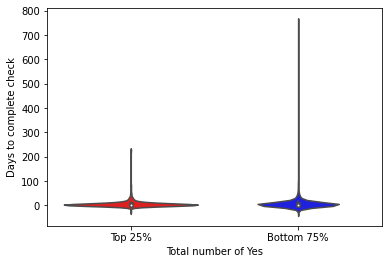

In [360]:
third_quartile = np.percentile(sum_yes_l, 75)

# グループ分け

group1_diff_l = [diff for sum_yes, diff in zip(sum_yes_l, diff_l) if sum_yes > third_quartile]
group2_diff_l = [diff for sum_yes, diff in zip(sum_yes_l, diff_l) if sum_yes <= third_quartile]

# データフレームの作成
import pandas as pd

data = {
    'diff_l': group1_diff_l + group2_diff_l,
    'Group': ['Top 25%'] * len(group1_diff_l) + ['Bottom 75%'] * len(group2_diff_l)
}

df = pd.DataFrame(data)

# バイオリンプロットの作成
plt.figure(figsize=(6, 4))
sns.violinplot(x='Group', y='diff_l', data=df,palette={'Top 25%': 'red', 'Bottom 75%': 'blue'})
# plt.title('Violin Plot of diff_l by Group')
plt.xlabel('Total number of Yes')
plt.ylabel('Days to complete check')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 散布図の作成
threshold = np.percentile(sum_yes_l, sikii)
# 色を設定（上位30%は赤、それ以外は青）
colors = ['red' if val >= threshold else 'blue' for val in sum_yes_l]

plt.scatter(diff_l,sum_yes_l,s=10,alpha=0.1,c=colors)

# タイトルとラベルの設定
# plt.title("Scatter Plot Example")
plt.xlabel("Days while fact-checking")
plt.ylabel("Sum of Yes responses by LLM")

plt.ylim(0, 15)
plt.xlim(0, 80)

plt.yticks(np.arange(0, 16, 5))
# グラフの表示
plt.show()
# plt.savefig('scatter_plot.png')

## 線形モデル

In [32]:
ans_d = read_bin("new_data/concat_ans_dict/ans_d.bin")#1405

yes = 0
no = 0
Unknown = 0
error = 0

import re
pattern = re.compile(r'<answer>(.*?)</answer>', re.IGNORECASE)
ans_3 = []
diff_l = []
k_l = []
for k,v in ans_d.items():
    if k in gpt4_df_date_diff_d:
        ans_l = []
        error_TF = False
        for i in range(52):
            match = pattern.findall(v[i])
    #         print(match)
            if len(match) == 1:
                if 'Yes' in match[0] or 'yes' in match[0] or 'YES' in match[0]:
    #                 print("1")
                    ans_l.append(1)
                elif 'Unknown' in match[0] or 'unknown' in match[0] or 'UNKNOWN' in match[0]:
    #                 print("13")
                    ans_l.append(0)
                elif 'No' in match[0] or 'no' in match[0] or 'NO' in match[0]:
    #                 print("12")
                    ans_l.append(-1)
                else:
                    error_TF = True

            else:
                error_TF = True

        if error_TF == False:
            ans_3.append(ans_l)
            diff_l.append(gpt4_df_date_diff_d[k])
            k_l.append(k)

In [30]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import mean_squared_error, r2_score

In [34]:
X_train, X_test, y_train, y_test = train_test_split(ans_3, diff_l, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(n_neighbors=5)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} - MSE: {mse:.4f}, R^2: {r2:.4f}")

Linear Regression - MSE: 204.8263, R^2: -0.0418
Random Forest Regressor - MSE: 223.9658, R^2: -0.1392
Support Vector Regressor - MSE: 223.6453, R^2: -0.1376
K-Nearest Neighbors Regressor - MSE: 231.2638, R^2: -0.1763


In [46]:
# LDAは無理か
# BERT or LLM
# 団体ごとに分けて分析
# なぜ新しい団体を作成している → 色が出るという仮説は成り立たない

# 実際にファクトチェックを進めてみればいい
# どのようなトピックが危ないのかの嗅覚はふわっとしたもの
# 広義の政治
# 手動での判定と比較してみる　日数がながいもの短いものを意図的にサンプリング

In [43]:
!pip install --upgrade scipy


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import re
import numpy as np
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

ImportError: cannot import name 'triu' from 'scipy.linalg.special_matrices' (c:\users\teramoto\appdata\local\programs\python\python39\lib\site-packages\scipy\linalg\special_matrices.py)

In [38]:
import numpy as np
triu = np.triu

In [37]:


# データセット (例: {Twitter ID: Tweet})


stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\s+', ' ', text)  # 余分なスペースの削除
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # 数字や記号の削除
    text = text.lower()  # 小文字化
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return words

processed_docs = [preprocess(tweet) for tweet in CL_d.values()]

# 辞書とコーパスの作成
id2word = corpora.Dictionary(processed_docs)
corpus = [id2word.doc2bow(doc) for doc in processed_docs]

# トピック数の自動決定 (コヒーレンススコア)
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics, 
                                                random_state=42,
                                                update_every=1,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=processed_docs, start=2, limit=15, step=1)

# 最適なトピック数を選択
optimal_model_index = np.argmax(coherence_values)
optimal_model = model_list[optimal_model_index]
optimal_num_topics = optimal_model_index + 2  # コヒーレンス計算時の開始トピック数が2の場合

# 結果の表示
print(f"Optimal number of topics: {optimal_num_topics}")
topics = optimal_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


ImportError: cannot import name 'triu' from 'scipy.linalg.special_matrices' (c:\users\teramoto\appdata\local\programs\python\python39\lib\site-packages\scipy\linalg\special_matrices.py)